In [1]:
# Importing needed Packe
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, timedelta
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [3]:
# Getting cryptocurrency and vs_currency and days from the user
crypto_id = input("Enter Id: ")
vs_currency = input("Enter vs_currency: ")
days = int(input("Enter the number of how many days ago you want(e.g: 1,14,30): "))

Enter Id:  bitcoin
Enter vs_currency:  usd
Enter the number of how many days ago you want(e.g: 1,14,30):  10


#### Showing cryptocurrency's date in a DataFrame

In [4]:
req = requests.get("https://api.coingecko.com/api/v3/coins/%s/market_chart?vs_currency=%s&days=%s&interval=daily" % (crypto_id, vs_currency, days-1)) # Sending the request

dates = pd.Series([date.today() - timedelta(days = day) for day in range(days)]) # Series of last 10 dates
prices = pd.Series(reversed([price[1] for price in req.json()['prices']])) # Series of last 10 days prices
market_caps = pd.Series(reversed([mk[1] for mk in req.json()['market_caps']])) # Series of last 10 days marker caps
total_volumes = pd.Series(reversed([tv[1] for tv in req.json()['total_volumes']])) # Series of last 10 days total volumes
# Cryptocurrency's DataFrame
crypto_df = pd.DataFrame(
    {
        'Price':prices,
        'Market Caps':market_caps,
        'Total Volumes':total_volumes
    },
)
crypto_df.index = dates
crypto_df

,Price,Market Caps,Total Volumes
2022-07-06,20163.033310,3.860440e+11,2.382160e+10
2022-07-05,20188.779664,3.853018e+11,2.362327e+10
2022-07-04,20257.012329,3.864252e+11,1.863486e+10
2022-07-03,19310.233219,3.685494e+11,1.397697e+10
2022-07-02,19268.227003,3.677067e+11,1.560172e+10
2022-07-01,19407.447430,3.709165e+11,2.875678e+10
2022-06-30,19608.397493,3.659842e+11,2.281652e+10
2022-06-29,20108.529473,3.840679e+11,2.074433e+10
2022-06-28,20282.542479,3.866069e+11,1.816121e+10
2022-06-27,20751.477531,3.959146e+11,1.771901e+10


#### Showing cryptocurrency's data in Plots

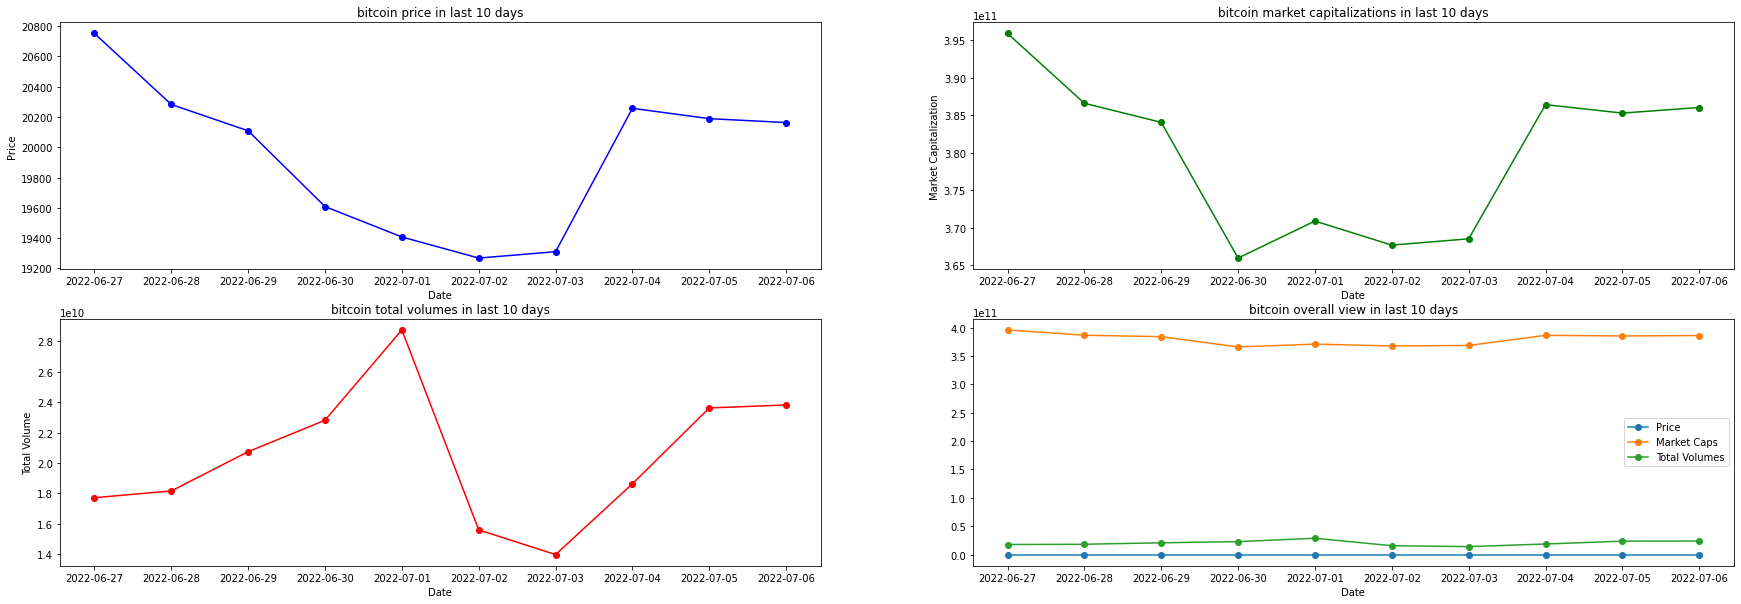

In [5]:
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(30, 10)) # Creating figures for pltos
fig, ((ax1, ax2), (ax3, ax4)) = plot_objects

# Showing cryptocurrency's price in a plot
ax1.plot(crypto_df.index, crypto_df["Price"], 'bo-')
ax1.set_title("%s price in last %s days" % (crypto_id, days))
ax1.set_xlabel("Date")
ax1.set_ylabel("Price")

# Showing cryptocurrency's market caps in a plot
ax2.plot(crypto_df.index, crypto_df["Market Caps"], 'go-')
ax2.set_title("%s market capitalizations in last %s days" % (crypto_id, days))
ax2.set_xlabel("Date")
ax2.set_ylabel("Market Capitalization")

# Shwoing cryptocurrency's total volumes in a plot
ax3.plot(crypto_df.index, crypto_df["Total Volumes"], 'ro-')
ax3.set_title("%s total volumes in last %s days" % (crypto_id, days))
ax3.set_xlabel("Date")
ax3.set_ylabel("Total Volume")

# Showing cryptocurrency's overall view in a plot
ax4.plot(crypto_df, 'o-')
ax4.set_title("%s overall view in last %s days" % (crypto_id, days))
ax4.set_xlabel("Date")
ax4.legend(crypto_df.columns)

#### Showing cryptocurrency's data in Bars

Text(0, 0.5, 'Total Volume')

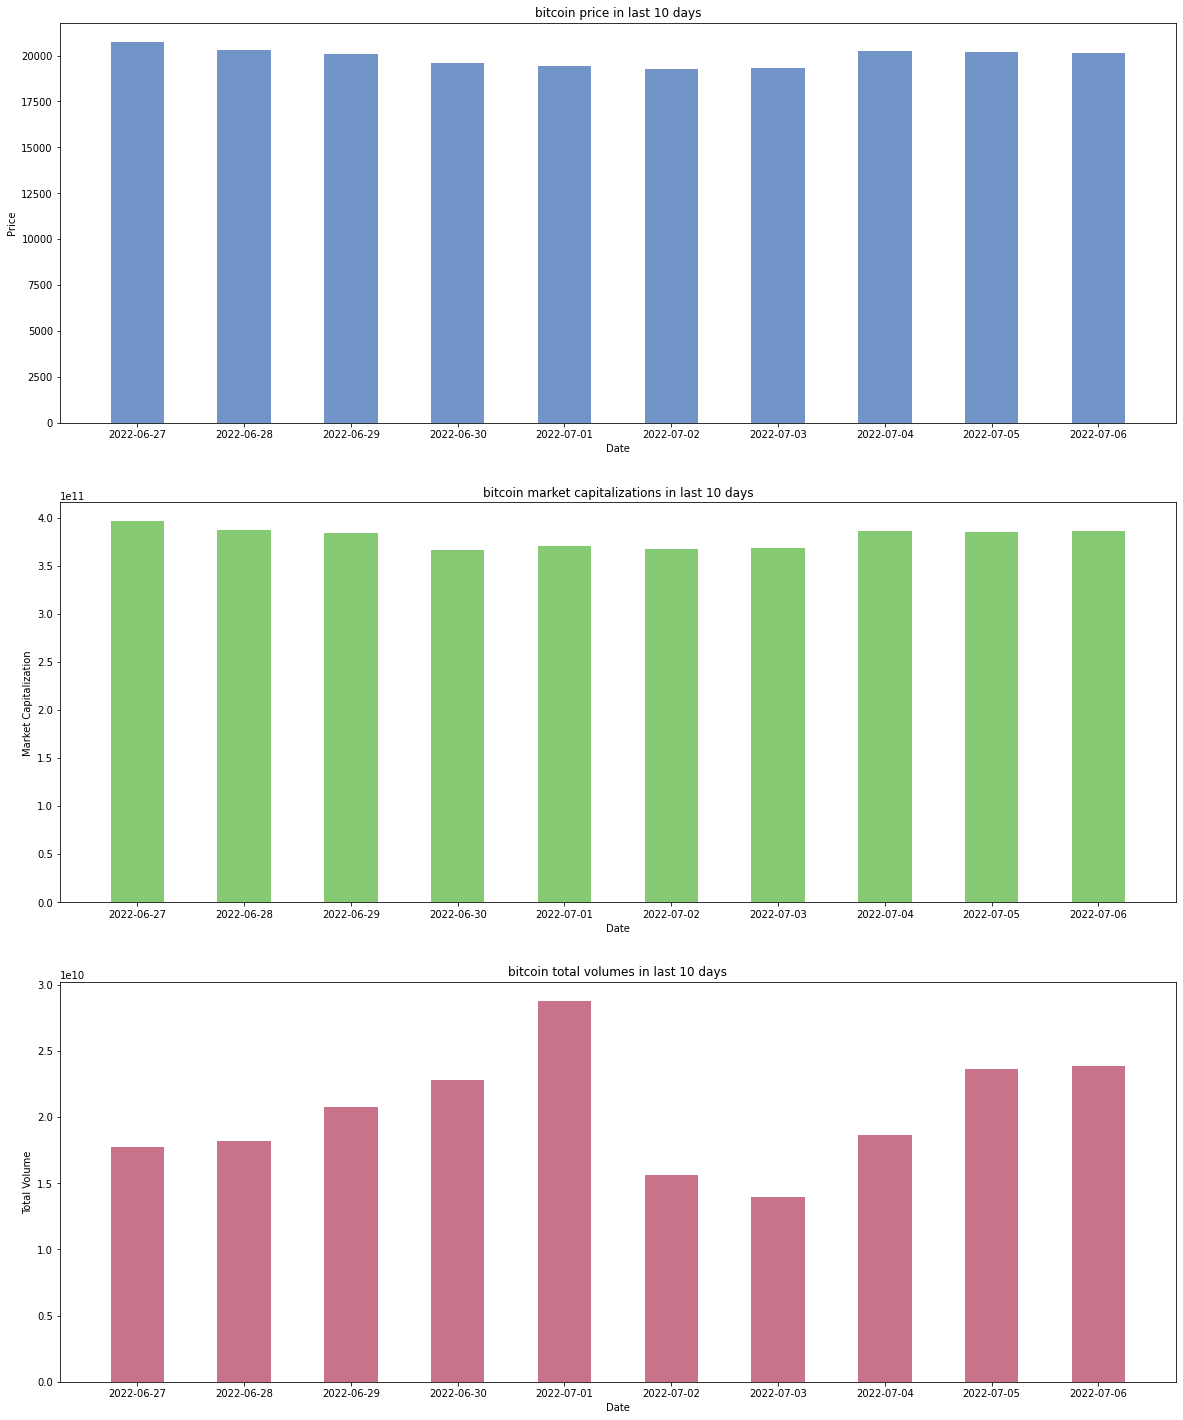

In [6]:
plot_objects = plt.subplots(nrows=3, ncols=1, figsize=(20, 25)) # Creating figures for bars
fig, ((ax1, ax2, ax3)) = plot_objects

# Showing cryptocurrency's price in a bar
ax1.bar(crypto_df.index, crypto_df["Price"], color="#7394c9", width=0.5)
ax1.set_title("%s price in last %s days" % (crypto_id, days))
ax1.set_xlabel("Date")
ax1.set_ylabel("Price")

# Showing cryptocurrency's market caps in a bar
ax2.bar(crypto_df.index, crypto_df["Market Caps"], color="#86c973", width=0.5)
ax2.set_title("%s market capitalizations in last %s days" % (crypto_id, days))
ax2.set_xlabel("Date")
ax2.set_ylabel("Market Capitalization")

# Shwoing cryptocurrency's total volumes in a bar
ax3.bar(crypto_df.index, crypto_df["Total Volumes"], color="#c9738a", width=0.5)
ax3.set_title("%s total volumes in last %s days" % (crypto_id, days))
ax3.set_xlabel("Date")
ax3.set_ylabel("Total Volume")

### Predict Tomorrow's price

In [37]:
days = 60
req = requests.get("https://api.coingecko.com/api/v3/coins/%s/market_chart?vs_currency=%s&days=%s&interval=daily" % (crypto_id, vs_currency, days-1))

dates = pd.Series([date.today() - timedelta(days = day) for day in range(days)]) # Series of last 10 dates
prices = pd.Series(reversed([price[1] for price in req.json()['prices']])) # Series of last 10 days prices

crypto_df = pd.DataFrame(
    {
        'Price':prices,
    },
)
crypto_df.index = dates
crypto_df.head()

,Price
2022-07-06,20163.033310
2022-07-05,20188.779664
2022-07-04,20257.012329
2022-07-03,19310.233219
2022-07-02,19268.227003


In [58]:
x = np.arange(1, 61).reshape(-1, 1)
y = (np.array(crypto_df['Price']).reshape(-1, 1))[::-1]

prediction = LinearRegression()
prediction.fit(x, y)
tomorrow_price = prediction.predict([[61]])
tomorrow_price

array([[18965.90459082]])